In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('../data/5000topsongs.csv')

In [40]:
df.head()

,id,title,artist,release_date,genres,user_score,rating_count,album_link
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings",https://www.albumoftheyear.org/album/29250-ken...
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings",https://www.albumoftheyear.org/album/3840-kend...
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings",https://www.albumoftheyear.org/album/363-radio...
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings",https://www.albumoftheyear.org/album/5600-stev...
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings",https://www.albumoftheyear.org/album/362-radio...


In [41]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')


In [42]:
df['rating_count'] = df['rating_count'].str.replace('ratings','',regex=False)

In [43]:
df['rating_count'] = df['rating_count'].str.replace(',','',regex=True)

In [44]:
df['rating_count'] = df['rating_count'].astype(int)

In [45]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [46]:
mean_user_score = df.groupby(['year'])['user_score'].mean().reset_index().sort_values(by = ['user_score'], ascending = False)

In [47]:
mean_user_score

,year,user_score
6,1961.0,84.000000
4,1959.0,83.285714
16,1971.0,83.153846
10,1965.0,82.785714
42,1997.0,82.647887
...,...,...
3,1958.0,78.250000
68,2023.0,78.209184
69,2024.0,78.125628
0,1955.0,77.500000


In [53]:
genres = df['genres'].value_counts().head(10).reset_index()
genres

,genres,count
0,Indie Rock,57
1,"Singer-Songwriter, Contemporary Folk",35
2,Pop Rock,26
3,"Indie Folk, Singer-Songwriter",25
4,Alternative Rock,25
5,Post-Rock,24
6,Art Pop,24
7,Progressive Rock,22
8,Neo-Soul,21
9,Hard Bop,20


In [66]:
top_genre = genres['genres'].to_list()

In [67]:
top_genre

['Indie Rock',
 'Singer-Songwriter, Contemporary Folk',
 'Pop Rock',
 'Indie Folk, Singer-Songwriter',
 'Alternative Rock',
 'Post-Rock',
 'Art Pop',
 'Progressive Rock',
 'Neo-Soul',
 'Hard Bop']

In [71]:
genre_score = df[df['genres'].isin(top_genre)].groupby(['genres'])['user_score'].mean().reset_index().sort_values(by = ['user_score'],ascending = False)
genre_score

,genres,user_score
2,Hard Bop,81.950000
7,Post-Rock,81.833333
9,"Singer-Songwriter, Contemporary Folk",81.285714
3,"Indie Folk, Singer-Songwriter",80.920000
6,Pop Rock,80.153846
8,Progressive Rock,79.909091
5,Neo-Soul,79.571429
4,Indie Rock,79.561404
1,Art Pop,79.416667
0,Alternative Rock,79.000000


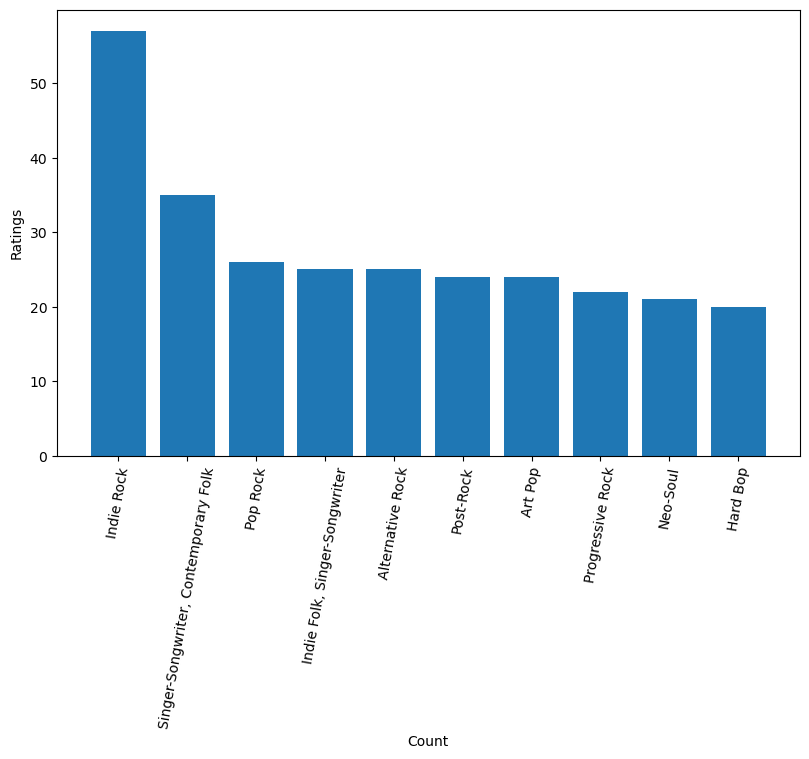

In [59]:
plt.figure(figsize=(8,5))
plt.bar(genres['genres'],genres['count'])
plt.tight_layout()
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.xticks(rotation=80)
plt.show()

In [ ]:
plt.plot(mean_user_score['user_score'],mean_user_score['year'])
plt.xlabel('Year')
plt.ylabel('User Score')
plt.show()

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.hist(df['user_score'],bins=50,color='m')
plt.title('User score for songs')
plt.xlabel('Ratings')
plt.ylabel('No.of Users')
plt.show()

In [ ]:
artist_count = df['artist'].value_counts().reset_index().head(10)
artist_count

In [ ]:
year = df['release_date']

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(x = artist_count['artist'],height = artist_count['count'], width = 0.5)
plt.title('Bar Plot')
plt.tight_layout()
plt.xticks(rotation = 70)
plt.show()


In [ ]:
best_artist = df.groupby(['artist'])['user_score'].mean().reset_index().sort_values(by = ['user_score'], ascending = False).head(10)

In [ ]:
best_artist.head()


In [ ]:
plt.figure(figsize = (8,5))
plt.bar(best_artist['artist'],best_artist['user_score'])
plt.title('High Ratings')
plt.tight_layout()
plt.xticks(rotation=50)
plt.show